<a href="https://colab.research.google.com/github/Sanyem78/Machine-learning/blob/main/lr_multiplevariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
df['test_score(out of 10)'].mean()

7.857142857142857

In [9]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [10]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.000000,9,50000
1,zero,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [17]:
!pip install word2number
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [18]:
reg = linear_model.LinearRegression()
reg.fit(df.drop(['salary($)'],axis='columns'),df['salary($)'])

LinearRegression()

In [19]:
reg.predict([[2,9,6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([53290.89255945])

In [20]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([92268.07227784])

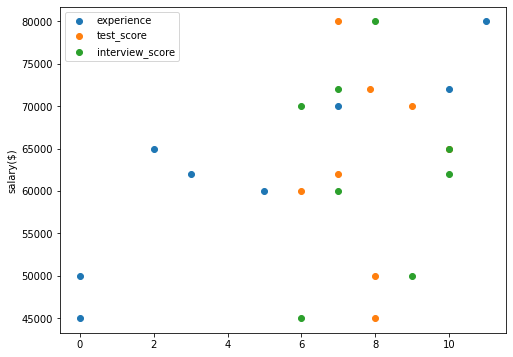

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df.experience, df['salary($)'],label = 'experience')
plt.scatter(df['test_score(out of 10)'], df['salary($)'],label = 'test_score')
plt.scatter(df['interview_score(out of 10)'], df['salary($)'],label='interview_score')
plt.ylabel('salary($)')
plt.legend()